In [11]:
import matplotlib.pyplot as plt  # matplotlib for some plotting
import numpy as np  # numeric python functions
import pandas as pd  # need this to load our data from the csv files

from pyconturb import gen_turb, gen_spat_grid  # generate turbulence, useful helper
from pyconturb.sig_models import iec_sig  # IEC 61400-1 turbulence std dev
from pyconturb.spectral_models import kaimal_spectrum  # Kaimal spectrum
from pyconturb.wind_profiles import constant_profile, power_profile  # wind-speed profile functions

from _nb_utils import plot_slice
import h5py

## Unconstrained Turbulence ##

In [12]:
# y = np.linspace(-5, 5, 3) #11) #22)  # 11 lateral points from -50 to 50 (center @ 0)
# z = np.linspace(0.5, 10.5, 5) #13) # 26)  # 13 vertical points from 40 to 160 (center @ 100)

# to match ethan's example
ny = 41
nz = 20
y = np.linspace(-10.0, 10.0, ny) #11) #22)  # 11 lateral points from -50 to 50 (center @ 0)
z = np.linspace(0.00001, 10.0, nz) #13) # 26)  # 13 vertical points from 40 to 160 (center @ 100)

spat_df = gen_spat_grid(y, z)  # if `comps` not passed in, assumes all 3 components are wanted
spat_df.head()  # look at the first few rows

,u_p0,v_p0,w_p0,u_p1,v_p1,w_p1,u_p2,v_p2,w_p2,u_p3,...,w_p816,u_p817,v_p817,w_p817,u_p818,v_p818,w_p818,u_p819,v_p819,w_p819
k,0.00000,1.00000,2.00000,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,...,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.0,1.0,2.0
x,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
y,-10.00000,-10.00000,-10.00000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0
z,0.00001,0.00001,0.00001,0.552641,0.552641,0.552641,1.105272,1.105272,1.105272,1.657903,...,8.842107,9.394738,9.394738,9.394738,9.947369,9.947369,9.947369,10.5,10.5,10.5


In [13]:
t_final = 10.0
t_steps = 50
dt = t_final / t_steps
time = np.linspace(0, t_final, t_steps)

In [14]:
time

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [15]:
turb_df = gen_turb(spat_df, T=t_final, dt=dt, u_ref=10) # T=10, dt = .05 s (20 Hz) when comparing to duramat measurements
turb_df.head()

,u_p0,v_p0,w_p0,u_p1,v_p1,w_p1,u_p2,v_p2,w_p2,u_p3,...,w_p816,u_p817,v_p817,w_p817,u_p818,v_p818,w_p818,u_p819,v_p819,w_p819
0.0,0.339081,-0.908865,0.922002,5.082432,-0.050339,0.274690,4.492060,-1.032231,0.064486,4.210488,...,-1.075391,5.025670,0.504298,-0.151147,5.096085,-2.173860,-0.304387,5.820762,1.284765,2.125314
0.2,3.563161,0.364048,1.853795,3.159262,-0.149376,0.766365,5.732624,-3.510382,0.362834,3.455937,...,-0.732916,6.155150,0.873312,-0.556145,7.564737,-0.364295,-0.142030,6.600426,0.635253,1.617945
0.4,0.555897,-2.099959,0.201009,3.587244,-2.407386,0.425664,1.320876,0.081030,-0.187547,1.654534,...,0.520447,6.156867,0.697581,-1.592015,6.976353,0.756337,0.968162,5.188125,-1.057469,0.632302
0.6,-4.251136,-1.267313,-0.968737,1.581052,-2.939450,3.135535,2.096738,1.140827,-0.420468,1.587589,...,0.824486,6.544946,0.382987,0.652309,5.913492,-0.250684,0.611920,6.854542,-1.280919,1.045758
0.8,-0.024609,-0.459051,-2.049291,2.320923,-0.209822,1.748588,3.219467,1.192848,1.643931,5.205568,...,2.932363,7.754262,2.089630,0.234025,7.913902,-2.391276,-1.384049,7.609475,-0.783019,-0.728571


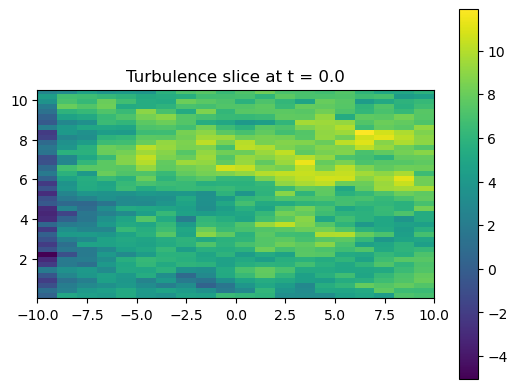

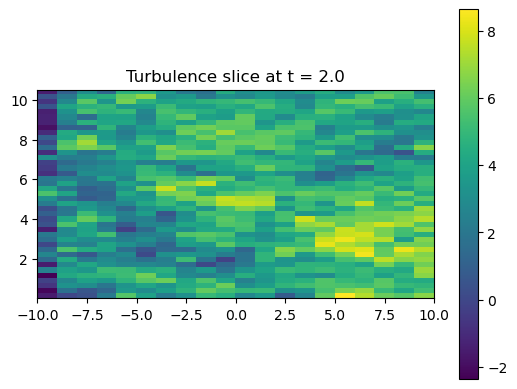

In [16]:
ts = [0.0, 2.0] #, 4.0] [0, int(len(turb_df)/2), -1] #[0.0, 2.0] #, 4.0]

for t in ts:
    ax = plot_slice(spat_df, turb_df, val=t) #round(time[t],1))
    ax.set_title(f'Turbulence slice at t = {t}');
    # ax.set_title(f'Turbulence slice at t = {round(time[t],1)}');

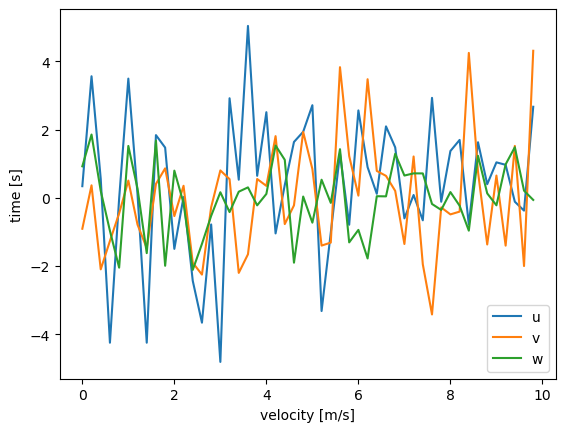

In [17]:
plt.plot(turb_df.u_p0, label='u')
plt.plot(turb_df.v_p0, label='v')
plt.plot(turb_df.w_p0, label='w')
plt.xlabel('velocity [m/s]')
plt.ylabel('time [s]')
plt.legend()

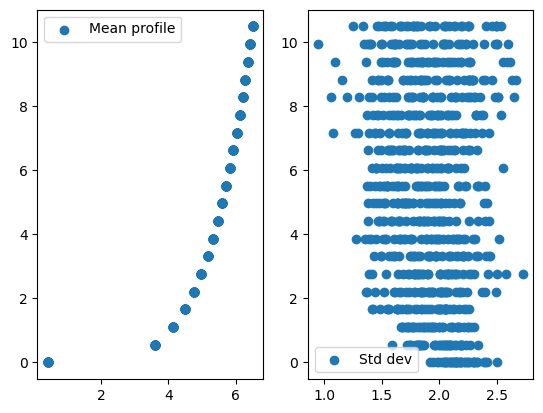

In [18]:
stats = turb_df.filter(regex='u_', axis=1).describe().loc[['mean', 'std']]
# plot
plt.clf(); plt.subplot(1, 2, 1);
plt.scatter(stats.loc['mean'], spat_df.filter(regex='u_').loc['z'], label='Mean profile')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(stats.loc['std'], spat_df.filter(regex='u_').loc['z'], label='Std dev')
plt.legend();

In [19]:
# reshape to 3D array
data = {}
data['u'] = turb_df.filter(regex='u').values.reshape(len(turb_df),y.size,z.size).transpose((0, 2, 1))
data['v'] = turb_df.filter(regex='v').values.reshape(len(turb_df),y.size,z.size).transpose((0, 2, 1))
data['w'] = turb_df.filter(regex='w').values.reshape(len(turb_df),y.size,z.size).transpose((0, 2, 1))

# data['u'] = turb_df.filter(regex='u').values.reshape(len(turb_df),z.size,y.size)
# data['v'] = turb_df.filter(regex='v').values.reshape(len(turb_df),z.size,y.size)
# data['w'] = turb_df.filter(regex='w').values.reshape(len(turb_df),z.size,y.size)

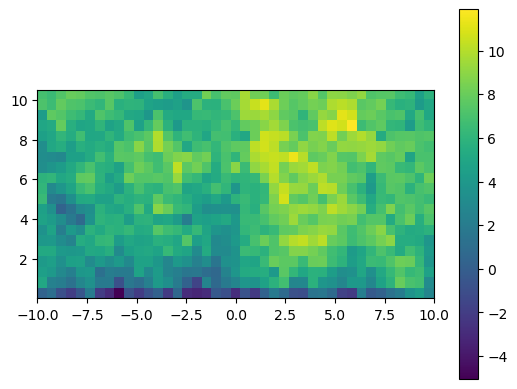

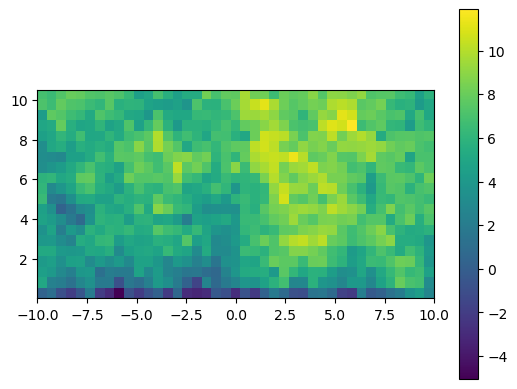

In [20]:
fig, ax = plt.subplots()
plt.imshow(data['u'][0,:,:],  # imshow requires nz-ny slice
            origin='lower',  # smallest y-z in lower left, not upper left
            extent=[y[0], y[-1], z[0], z[-1]],  # lateral and vertical limits
            interpolation='none')  # image smoothing
plt.colorbar()

# fig, ax = plt.subplots()
# plt.imshow(data['u'][0,:,:],  # imshow requires nz-ny slice
#             origin='lower',  # smallest y-z in lower left, not upper left
#             extent=[y[0], y[-1], z[0], z[-1]],  # lateral and vertical limits
#             interpolation='none')  # image smoothing
# plt.colorbar()

test_u = data['u'] #.transpose((0, 2, 1))

fig, ax = plt.subplots()
plt.imshow(test_u[0,:,:],  # imshow requires nz-ny slice
            origin='lower',  # smallest y-z in lower left, not upper left
            extent=[y[0], y[-1], z[0], z[-1]],  # lateral and vertical limits
            interpolation='none')  # image smoothing
plt.colorbar()

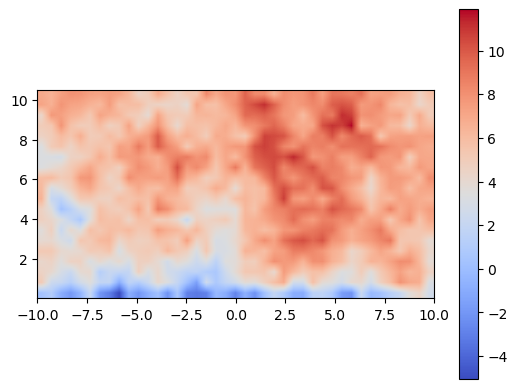

In [21]:
fig, ax = plt.subplots()
plt.imshow(data['u'][0,:,:],  # imshow requires nz-ny slice
            origin='lower',  # smallest y-z in lower left, not upper left
            extent=[y[0], y[-1], z[0], z[-1]],  # lateral and vertical limits
            interpolation='bilinear',
            cmap='coolwarm')  # image smoothing
plt.colorbar()

In [22]:
np.shape(data['u'])

(50, 20, 41)

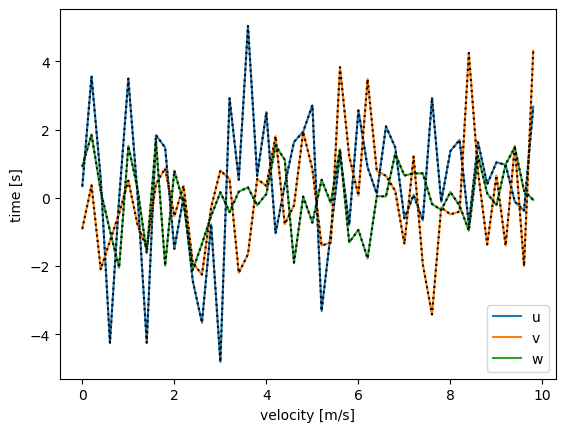

In [23]:
time = turb_df.index.values
fig, ax = plt.subplots()

ax.plot(turb_df.u_p0, label='u')
ax.plot(turb_df.v_p0, label='v')
ax.plot(turb_df.w_p0, label='w')
ax.plot(time,data['u'][:,0,0], 'k:', label='')
ax.plot(time,data['v'][:,0,0], 'k:', label='')
ax.plot(time,data['w'][:,0,0], 'k:', label='')
ax.set_xlabel('velocity [m/s]')
ax.set_ylabel('time [s]')
plt.legend()

In [24]:
np.std(data['u'], axis=0).shape

(20, 41)

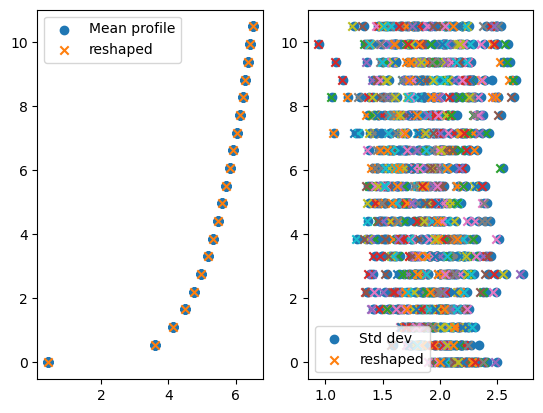

In [25]:
stats = turb_df.filter(regex='u_', axis=1).describe().loc[['mean', 'std']]
# plot
plt.clf(); plt.subplot(1, 2, 1);
plt.scatter(stats.loc['mean'], spat_df.filter(regex='u_').loc['z'], label='Mean profile')
plt.scatter((data['u'].mean(axis=0)).mean(axis=1), z, marker='x', label='reshaped')

plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(stats.loc['std'], spat_df.filter(regex='u_').loc['z'], label='Std dev')
for i in range(np.std(data['u'], axis=0).shape[1]):
    plt.scatter(np.std(data['u'], axis=0)[:,i], z, marker='x', label='reshaped' if i==0 else '')
plt.legend();

(np.float64(-11.0),
 np.float64(11.0),
 np.float64(-0.5249895000000001),
 np.float64(11.0249995))

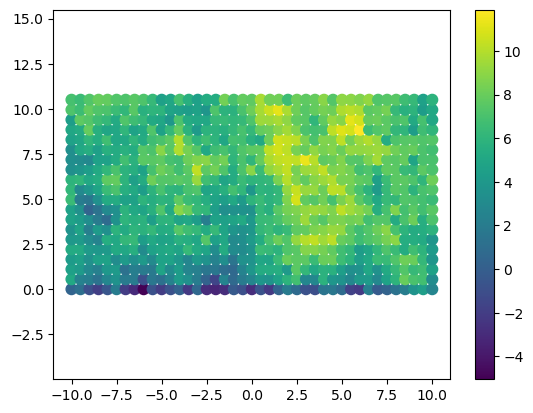

In [26]:
# yy_mesh, zz_mesh = np.meshgrid(y[:], z[:])
# cbar = plt.scatter(yy_mesh, zz_mesh, c=data['u'][0, :, :], s=60) #, vmin=0.5, vmax=2.7)
yy_mesh, zz_mesh = np.meshgrid(y[:], z[:])
cbar = plt.scatter(yy_mesh, zz_mesh, c=data['u'][0,:,:], s=60) #, vmin=0.5, vmax=2.7)

plt.colorbar(cbar)
plt.axis("equal")

time_index (50,) float32
u (50, 20, 41) float32
v (50, 20, 41) float32
w (50, 20, 41) float32
y_coordinates (41,) float32
z_coordinates (20,) float32


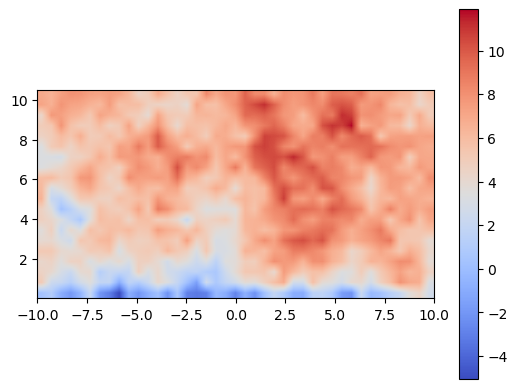

In [27]:
with h5py.File("pct_turb_data.h5", "w") as fp:
    fp.create_dataset("time_index", shape=(t_steps,))
    fp["time_index"][:] = time
    
    fp.create_dataset("y_coordinates", shape=(ny,))
    fp["y_coordinates"][:] = y
        
    fp.create_dataset("z_coordinates", shape=(nz,))
    fp["z_coordinates"][:] = z
        
    fp.create_dataset("u", shape=(t_steps, nz, ny))
    fp["u"][:] = data['u'][:]
    
    fp.create_dataset("v", shape=(t_steps, nz, ny))
    fp["v"][:] = data['v'][:]
    
    fp.create_dataset("w", shape=(t_steps, nz, ny))
    fp["w"][:] = data['w'][:]

with h5py.File("pct_turb_data.h5", "r") as fp:
    for key, val in fp.items():
        print(key, val.shape, val.dtype)
        
    # yy_mesh, zz_mesh = np.meshgrid(fp["y_coordinates"][:], fp["z_coordinates"][:])
    # cbar = plt.scatter(yy_mesh, zz_mesh, c=fp["u"][0, :, :], s=60, cmap='bwr') #, vmin=0.5, vmax=2.7)
    # plt.colorbar(cbar)
    # plt.axis("equal")

    y_fp = fp["y_coordinates"][:]
    z_fp = fp["z_coordinates"][:]

    fig, ax = plt.subplots()
    plt.imshow(fp["u"][0, :, :],  # imshow requires nz-ny slice
                origin='lower',  # smallest y-z in lower left, not upper left
                extent=[y_fp[0], y_fp[-1], z_fp[0], z_fp[-1]],  # lateral and vertical limits
                interpolation='bilinear',
                cmap='coolwarm')  # image smoothing
    plt.colorbar()

time_index (50,) float32
u (50, 20, 41) float32
v (50, 20, 41) float32
w (50, 20, 41) float32
y_coordinates (41,) float32
z_coordinates (20,) float32


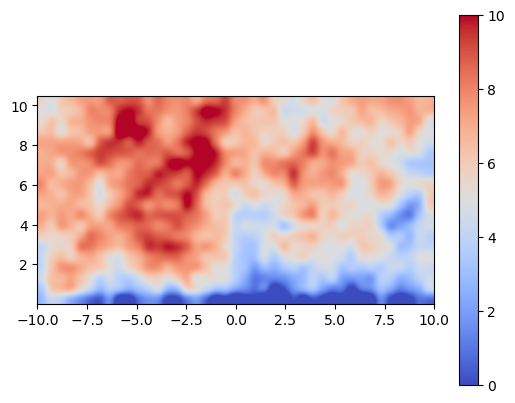

In [28]:
with h5py.File("pct_turb_data.h5", "r") as fp:
    for key, val in fp.items():
        print(key, val.shape, val.dtype)
        
    # yy_mesh, zz_mesh = np.meshgrid(fp["y_coordinates"][:], fp["z_coordinates"][:])
    # cbar = plt.scatter(yy_mesh, zz_mesh, c=fp["u"][0, :, :], s=60, cmap='bwr') #, vmin=0.5, vmax=2.7)
    # plt.colorbar(cbar)
    # plt.axis("equal")

    y_fp = fp["y_coordinates"][:]
    z_fp = fp["z_coordinates"][:]

    flipped_array = np.fliplr(fp["u"][0, :, :])

    fig, ax = plt.subplots()
    plt.imshow(flipped_array,  # imshow requires nz-ny slice
                origin='lower',  # smallest y-z in lower left, not upper left
                extent=[y_fp[0], y_fp[-1], z_fp[0], z_fp[-1]],  # lateral and vertical limits
                vmin=0.0, vmax=10.0,
                interpolation='gaussian',
                cmap='coolwarm')  # image smoothing
    plt.colorbar()

time_index (50,) float32
u (50, 20, 41) float32
v (50, 20, 41) float32
w (50, 20, 41) float32
y_coordinates (41,) float32
z_coordinates (20,) float32


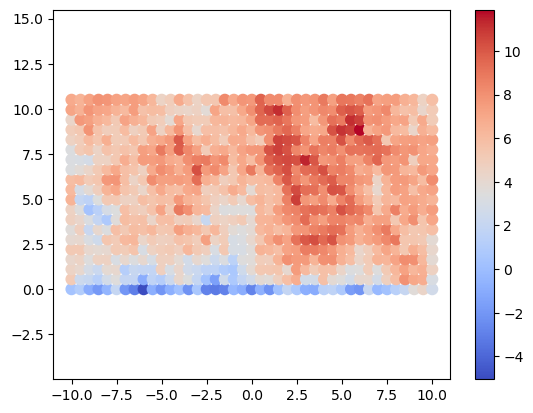

In [31]:
with h5py.File("pct_turb_data.h5", "r") as fp:
    for key, val in fp.items():
        print(key, val.shape, val.dtype)
        
    yy_mesh, zz_mesh = np.meshgrid(fp["y_coordinates"][:], fp["z_coordinates"][:])
    cbar = plt.scatter(yy_mesh, zz_mesh, c=fp["u"][0, :, :], s=60, cmap='coolwarm') #, vmin=0.5, vmax=2.7)
    plt.colorbar(cbar)
    plt.axis("equal")

In [30]:
?gen_turb

Signature:
gen_turb(
    spat_df,
    T=600,
    nt=600,
    con_tc=None,
    coh_model='iec',
    coh_file=None,
    wsp_func=None,
    sig_func=None,
    spec_func=None,
    interp_data='none',
    seed=None,
    nf_chunk=1,
    dtype=<class 'numpy.float64'>,
    verbose=False,
    **kwargs,
)
Docstring:
Generate a turbulence box (constrained or unconstrained).

Parameters
----------
spat_df : pandas.DataFrame
    Spatial information on the points to simulate. Must have rows `[k, x, y, z]`,
    and each of the `n_sp` columns corresponds to a different spatial location and
    turbine component (u, v or w).
T : float, optional
    Total length of time to simulate in seconds. Default is 600.
nt : int, optional
    Number of time steps for generated turbulence. Default is 600.
con_tc : pyconturb TimeConstraint, optional
    Optional constraining data for the simulation. The TimeConstraint object is built
    into PyConTurb; see documentation for more details.
coh_model : str, optional
 